In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


In [4]:
# Load the dataset
file_path = "C:/Users/hp/OneDrive/Desktop/aapl_dataset.csv"  # Replace with your actual file
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")
df = df.rename({'close_aapl': 'Close'}, axis=1)
df = df[['Close']]

In [6]:
# Step 1: Feature Engineering - Create Lag Features
df['Lag_1'] = df['Close'].shift(1)  # Previous day's close price
df['Lag_2'] = df['Close'].shift(2)  # 2-day lag
df['Lag_3'] = df['Close'].shift(3)  # 3-day lag
df.dropna(inplace=True)  # Drop rows with NaN values due to 

In [8]:
# Step 2: Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [10]:
# Separate Features and Target Variable
X_train, y_train = train[['Lag_1', 'Lag_2', 'Lag_3']], train['Close']
X_test, y_test = test[['Lag_1', 'Lag_2', 'Lag_3']], test['Close']


In [12]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Step 3: Forecasting
predictions = model.predict(X_test)

In [16]:
# Step 4: Model Evaluation
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions) * 100
r2 = r2_score(y_test, predictions)

In [18]:
# Print Results
print(f"Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"R-squared (R²): {r2:.4f}")

Linear Regression Model Performance:
Mean Squared Error (MSE): 4.4648
Root Mean Squared Error (RMSE): 2.1130
Mean Absolute Percentage Error (MAPE): 1.2516%
R-squared (R²): 0.9990


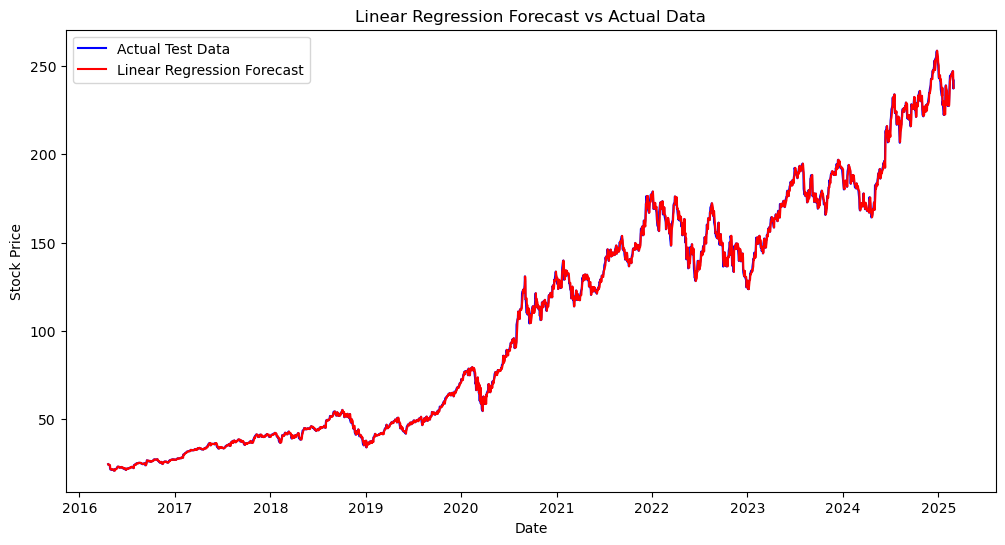

In [20]:
# Step 5: Visualizing Results
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label="Actual Test Data", color="blue")
plt.plot(test.index, predictions, label="Linear Regression Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Linear Regression Forecast vs Actual Data")
plt.legend()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


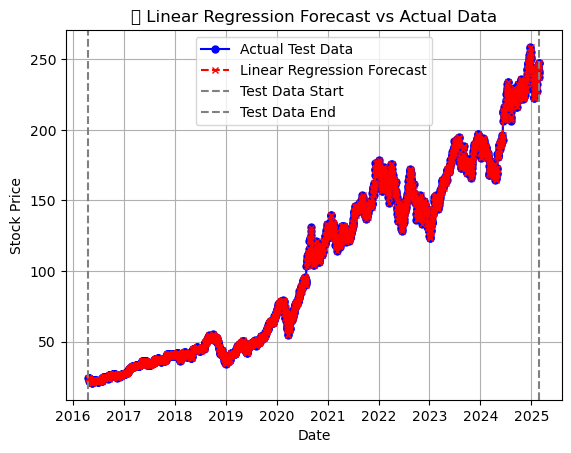

In [22]:
# Plot Actual Test Data
plt.plot(test.index, y_test, label="Actual Test Data", color="blue", linestyle='-', marker='o', markersize=5)

# Plot Linear Regression Predictions
plt.plot(test.index, predictions, label="Linear Regression Forecast", color="red", linestyle='--', marker='x', markersize=5)

# Highlight Start & End Points for Better Understanding
plt.axvline(test.index[0], color='gray', linestyle='--', label='Test Data Start')
plt.axvline(test.index[-1], color='gray', linestyle='--', label='Test Data End')

# Titles & Labels
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("📈 Linear Regression Forecast vs Actual Data")
plt.legend()
plt.grid(True)
plt.show()